# Implementation of Edmonds Karp algorithm for Maximal Flow.

## Library Importation

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
import pandas as pd
import csv

## BFS implementation and path augmentation

In [2]:
# --- BFS Helper ---
def bfs(capacity, source, sink, parent):
    visited = [False] * len(capacity)
    queue = deque([source])
    visited[source] = True

    while queue:
        u = queue.popleft()
        for v in range(len(capacity)):
            if not visited[v] and capacity[u][v] > 0:
                queue.append(v)
                visited[v] = True
                parent[v] = u
                if v == sink:
                    return True
    return False

# --- Path Tracing ---
def get_augmenting_path(parent, source, sink):
    path = []
    v = sink
    while v != source:
        path.append(v)
        v = parent[v]
    path.append(source)
    return list(reversed(path))

## Manual input and CSV importation

In [3]:
# --- Input from CSV using pandas ---
def load_graph_from_csv(filename):
    df = pd.read_csv(filename)
    graph = {}
    for _, row in df.iterrows():
        u, v, w = int(row['From']), int(row['To']), int(row['Capacity'])
        if u not in graph:
            graph[u] = {}
        graph[u][v] = w
        if v not in graph:
            graph[v] = {}
    return graph


# --- Manual Triple Input ---
def manual_input_graph():
    graph = {}
    num_edges = int(input("Enter the number of edges: "))
    for _ in range(num_edges):
        u, v, w = map(int, input("Enter edge as 'from to capacity': ").split())
        if u not in graph:
            graph[u] = {}
        graph[u][v] = w
        if v not in graph:
            graph[v] = {}
    return graph


# --- User Selection ---
def get_user_graph():
    method = input("Select input method (1 = Manual, 2 = CSV): ")
    if method == '2':
        filename = input("Enter CSV filename (default 'graph.csv'): ") or 'graph.csv'
        return load_graph_from_csv(filename)
    else:
        return manual_input_graph()

## Visualization of initial and final configuration

In [4]:
# --- Visualization Helper ---
def visualize_initial_and_final(graph, original_capacity, final_capacity, source, sink):
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    pos = nx.planar_layout(nx.DiGraph(graph))

    # Initial Graph
    G_init = nx.DiGraph()
    for u in graph:
        for v, w in graph[u].items():
            G_init.add_edge(u, v, capacity=w, flow=0)
    edge_labels_init = {(u, v): f"0/{w}" for u, v, w in G_init.edges(data='capacity')}
    nx.draw(G_init, pos, with_labels=True, node_color='lightblue', node_size=2000,
            font_size=16, font_weight="bold", arrowsize=20, ax=axes[0])
    nx.draw_networkx_edge_labels(G_init, pos, edge_labels=edge_labels_init, font_size=12, ax=axes[0])
    axes[0].set_title("Initial Network")

    # Final Graph
    G_final = nx.DiGraph()
    for u in graph:
        for v, w in graph[u].items():
            flow = w - final_capacity[u][v]
            G_final.add_edge(u, v, capacity=w, flow=flow)
    edge_labels_final = {(u, v): f"{G_final[u][v]['flow']}/{G_final[u][v]['capacity']}" for u, v in G_final.edges()}
    nx.draw(G_final, pos, with_labels=True, node_color='lightgreen', node_size=2000,
            font_size=16, font_weight="bold", arrowsize=20, ax=axes[1])
    nx.draw_networkx_edge_labels(G_final, pos, edge_labels=edge_labels_final, font_size=12, ax=axes[1])
    axes[1].set_title("Final Network")

    plt.tight_layout()
    plt.show()

## Implementation of Edmonds Karp algorithm

In [5]:
# --- Main Algorithm ---
def edmonds_karp(graph, source, sink):
    capacity = [[0] * len(graph) for _ in range(len(graph))]
    original_capacity = [[0] * len(graph) for _ in range(len(graph))]
    for u in graph:
        for v, w in graph[u].items():
            capacity[u][v] = w
            original_capacity[u][v] = w

    parent = [-1] * len(graph)
    max_flow = 0
    step = 0

    while bfs(capacity, source, sink, parent):
        path = get_augmenting_path(parent, source, sink)
        path_flow = float('Inf')
        s = sink
        while s != source:
            path_flow = min(path_flow, capacity[parent[s]][s])
            s = parent[s]

        v = sink
        while v != source:
            u = parent[v]
            capacity[u][v] -= path_flow
            capacity[v][u] += path_flow
            v = parent[v]

        max_flow += path_flow
        step += 1

        print(f"\n--- Step {step} ---")
        print(f"Augmenting path: {' -> '.join(map(str, path))}")
        print(f"Flow added this step: {path_flow}")
        print(f"Total flow so far: {max_flow}")

    visualize_initial_and_final(graph, original_capacity, capacity, source, sink)
    print(f"\n✅ Maximum Flow = {max_flow}")
    return max_flow, capacity

## Main function

Select input method (1 = Manual, 2 = CSV):  2
Enter CSV filename (default 'graph.csv'):  ex_karp.csv



--- Step 1 ---
Augmenting path: 0 -> 1 -> 3 -> 5
Flow added this step: 9
Total flow so far: 9

--- Step 2 ---
Augmenting path: 0 -> 2 -> 4 -> 5
Flow added this step: 4
Total flow so far: 13

--- Step 3 ---
Augmenting path: 0 -> 2 -> 4 -> 3 -> 5
Flow added this step: 7
Total flow so far: 20


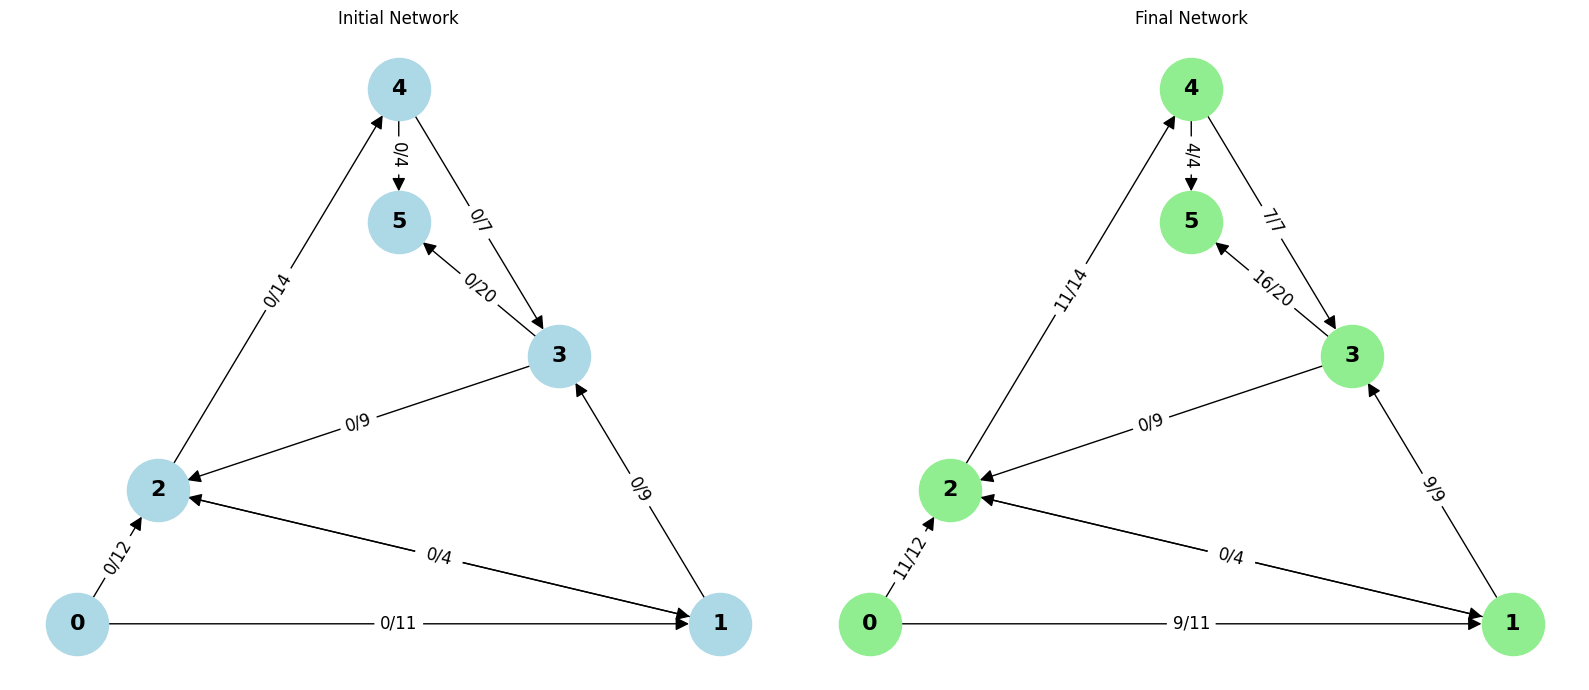


✅ Maximum Flow = 20


(20,
 [[0, 2, 1, 0, 0, 0],
  [9, 0, 15, 0, 0, 0],
  [11, 4, 0, 0, 3, 0],
  [0, 9, 9, 0, 7, 4],
  [0, 0, 11, 0, 0, 0],
  [0, 0, 0, 16, 4, 0]])

In [6]:
# --- Main Execution ---
graph = get_user_graph()
source = 0
sink = 5
edmonds_karp(graph, source, sink)